# BTC : Historical Prices

## Data source loading

In [27]:
import pandas as pd
import numpy as np

# Viz
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.figure_factory as ff

# Stats
import statsmodels.api as sm
from pylab import rcParams

In [4]:
btc_yahoo = pd.read_csv('/home/giujorge/datalake/lab/Crypto/crypto/data/external/yahoo/daily/usd/BTC-USD.csv')

In [28]:
btc_yahoo.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800.0
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200.0
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700.0
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600.0
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100.0


In [43]:
btc_yahoo.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
2541,2021-09-01,47099.773438,49111.089844,46562.437500,48847.027344,48847.027344,3.913940e+10
2542,2021-09-02,48807.847656,50343.421875,48652.320313,49327.722656,49327.722656,3.950807e+10
2543,2021-09-03,49288.250000,50982.273438,48386.085938,50025.375000,50025.375000,4.320618e+10
2544,2021-09-04,50009.324219,50545.582031,49548.781250,49944.625000,49944.625000,3.747133e+10
2545,2021-09-05,49967.257813,50380.734375,49548.671875,50380.734375,50380.734375,3.086566e+10


In [44]:
btc_yahoo.shape

(2546, 7)

In [8]:
btc_yahoo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2546 entries, 0 to 2545
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       2546 non-null   datetime64[ns]
 1   Open       2542 non-null   float64       
 2   High       2542 non-null   float64       
 3   Low        2542 non-null   float64       
 4   Close      2542 non-null   float64       
 5   Adj Close  2542 non-null   float64       
 6   Volume     2542 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 139.4 KB


In [5]:
btc_yahoo.Date = pd.to_datetime(btc_yahoo.Date)

In [6]:
btc_yahoo.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2542.000000,2542.000000,2542.000000,2542.000000,2542.000000,2.542000e+03
mean,8769.944647,9019.972647,8500.103779,8788.702374,8788.702374,1.335322e+10
std,12936.817459,13332.388616,12491.242153,12960.807565,12960.807565,1.980157e+10
min,176.897003,211.731003,171.509995,178.102997,178.102997,5.914570e+06
25%,574.081741,578.300003,568.766998,574.159744,574.159744,7.273237e+07
50%,5207.205079,5323.109131,5058.392090,5218.072510,5218.072510,4.337750e+09
75%,9522.637451,9699.815674,9311.406738,9524.767822,9524.767822,2.107336e+10
max,63523.753906,64863.097656,62208.964844,63503.457031,63503.457031,3.509679e+11


## Data Wrangling & plotting

### Plotting

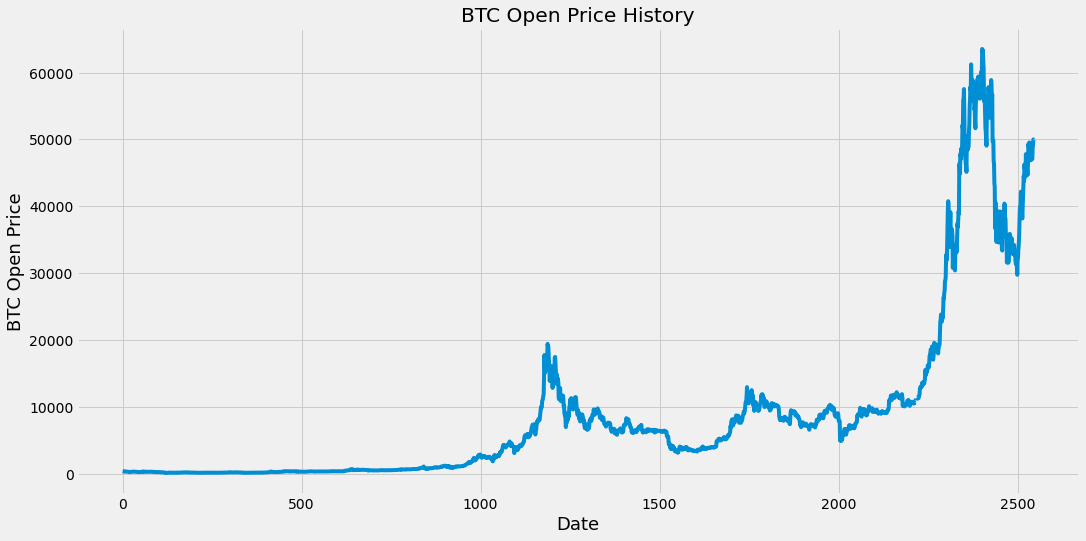

In [7]:
plt.figure(figsize=(16,8))
plt.title('BTC Open Price History')
plt.plot(btc_yahoo['Open'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('BTC Open Price',fontsize=18)
plt.show()

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>], dtype=object)

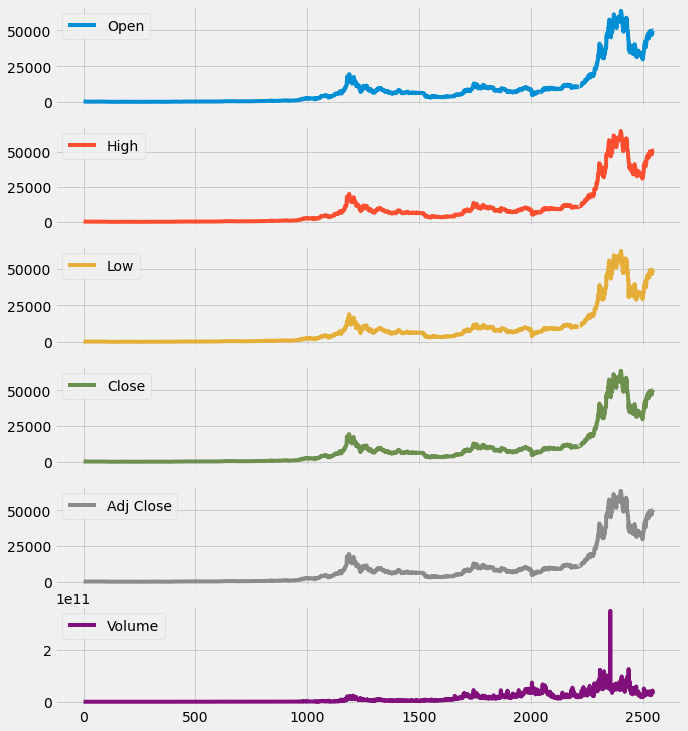

In [11]:
btc_yahoo.iloc[:,1:].plot(subplots=True, figsize=(10,12))

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>], dtype=object)

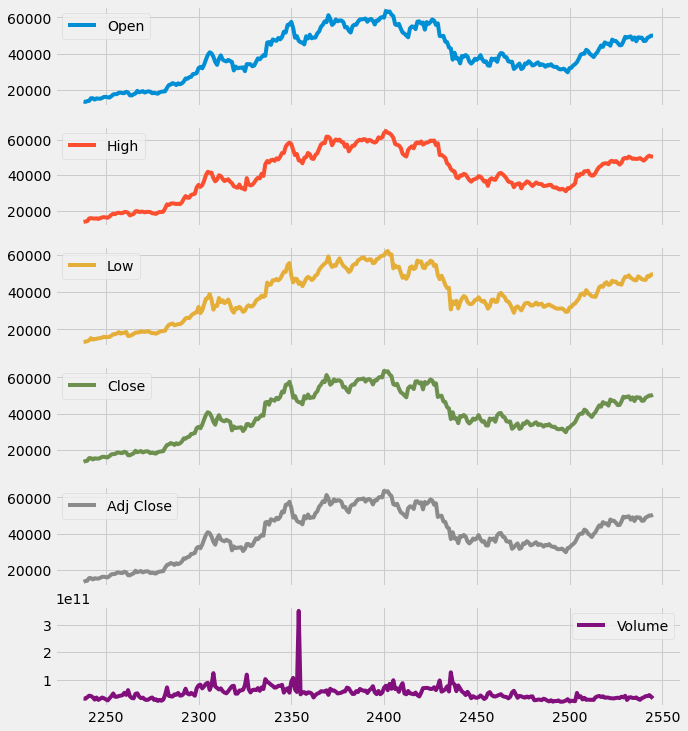

In [26]:
btc_yahoo[(btc_yahoo['Date'] > '2020-11-01')].iloc[:,1:].plot(subplots=True, figsize=(10,12))

In [ ]:
moyenne par mois et par an

In [ ]:
correlation 

In [ ]:
lag plot

In [14]:

trace = go.Ohlc(x=btc_yahoo.index,
                open=btc_yahoo.Open,
                high=btc_yahoo.High,
                low=btc_yahoo.Low,
                close=btc_yahoo.Close)
data = [trace]

iplot(data, filename='simple_ohlc')



## Missing values

In [40]:
percent_missing = btc_yahoo.isnull().sum() * 100 / len(btc_yahoo)
missing_value_btc_yahoo = pd.DataFrame({'column_name': btc_yahoo.columns,
                                 'percent_missing': ((percent_missing*100).round(2)) })
missing_value_btc_yahoo.sort_values('percent_missing', inplace=True, ascending=False)
missing_value_btc_yahoo

,column_name,percent_missing
Open,Open,15.71
High,High,15.71
Low,Low,15.71
Close,Close,15.71
Adj Close,Adj Close,15.71
Volume,Volume,15.71
Date,Date,0.00


In [22]:
btc_yahoo[btc_yahoo.Open.isnull()]

,Date,Open,High,Low,Close,Adj Close,Volume
2039,2020-04-17,NaN,NaN,NaN,NaN,NaN,NaN
2214,2020-10-09,NaN,NaN,NaN,NaN,NaN,NaN
2217,2020-10-12,NaN,NaN,NaN,NaN,NaN,NaN
2218,2020-10-13,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Decomposition of a Time Series